In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
%matplotlib inline
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings("ignore")

In [2]:
import numpy as np
data=pd.read_csv("/content/Electric_Production.csv")

In [3]:
data.shape

(397, 2)

In [4]:
data.head(397)

,DATE,Value
0,1/1/1985,72.5052
1,2/1/1985,70.6720
2,3/1/1985,62.4502
3,4/1/1985,57.4714
4,5/1/1985,55.3151
...,...,...
392,9/1/2017,98.6154
393,10/1/2017,93.6137
394,11/1/2017,97.3359
395,12/1/2017,114.7212


In [5]:
data.describe()

,Value
count,397.000000
mean,88.847218
std,15.387834
min,55.315100
25%,77.105200
50%,89.779500
75%,100.524400
max,129.404800


In [6]:
data.isnull().sum()

DATE     0
Value    0
dtype: int64

performing moving average

       DATE    Value
0  1/1/1985  72.5052
1  2/1/1985  70.6720
2  3/1/1985  62.4502
3  4/1/1985  57.4714
4  5/1/1985  55.3151
Index(['DATE', 'Value'], dtype='object')


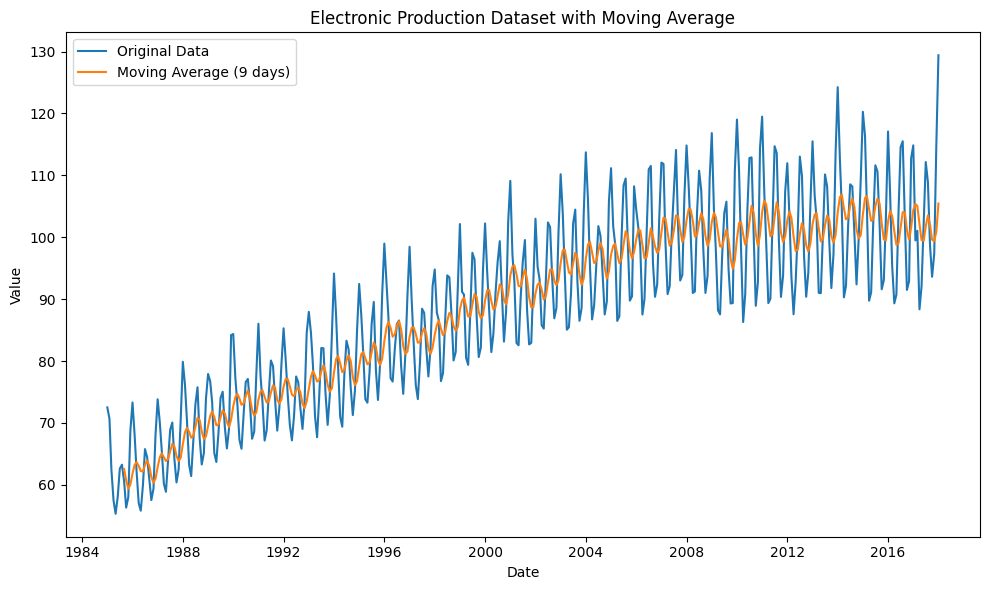

In [8]:
import pandas as pd
import matplotlib.pyplot as plt

print(data.head())
print(data.columns)

# Convert date column to datetime format
data['DATE'] = pd.to_datetime(data['DATE'])

# Sort the data by date
data = data.sort_values(by='DATE')


window_size = 9
data['Moving_Average'] = data['Value'].rolling(window=window_size).mean()

# Plot the original data and the moving average
plt.figure(figsize=(10, 6))
plt.plot(data['DATE'], data['Value'], label='Original Data')
plt.plot(data['DATE'], data['Moving_Average'], label=f'Moving Average ({window_size} days)')
plt.xlabel('Date')
plt.ylabel('Value')
plt.title('Electronic Production Dataset with Moving Average')
plt.legend()
plt.tight_layout()
plt.show()


trying to visualized deeply the graph

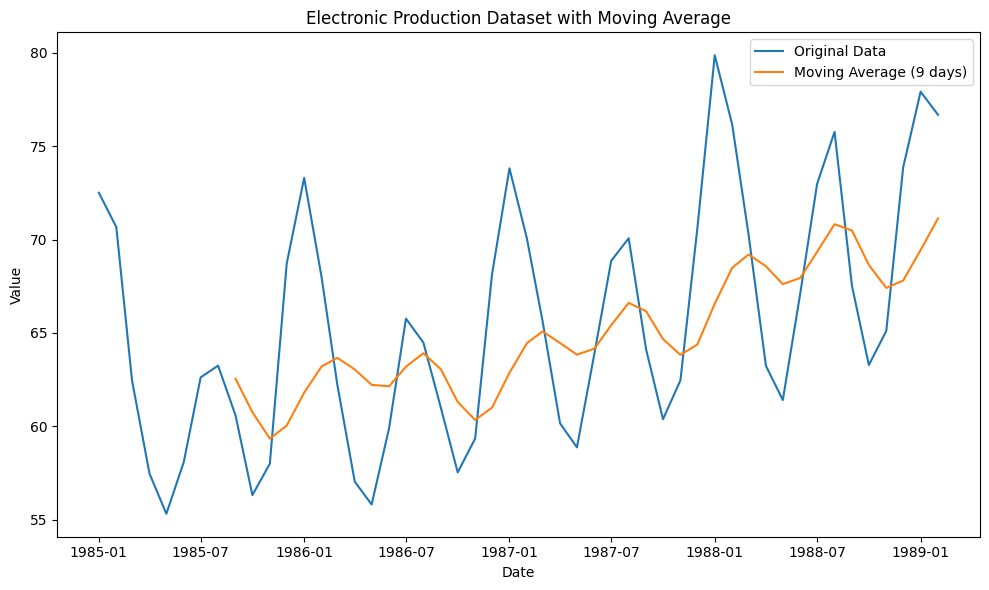

In [9]:
# Plot the original data and the moving average
plt.figure(figsize=(10, 6))
plt.plot(data['DATE'][:50], data['Value'][:50], label='Original Data')
plt.plot(data['DATE'][:50], data['Moving_Average'][:50], label=f'Moving Average ({window_size} days)')
plt.xlabel('Date')
plt.ylabel('Value')
plt.title('Electronic Production Dataset with Moving Average')
plt.legend()
plt.tight_layout()
plt.show()

simple exponential smoothing

/usr/local/lib/python3.10/dist-packages/pandas/util/_decorators.py:211: EstimationWarning: Model has no free parameters to estimate. Set optimized=False to suppress this warning
  return func(*args, **kwargs)


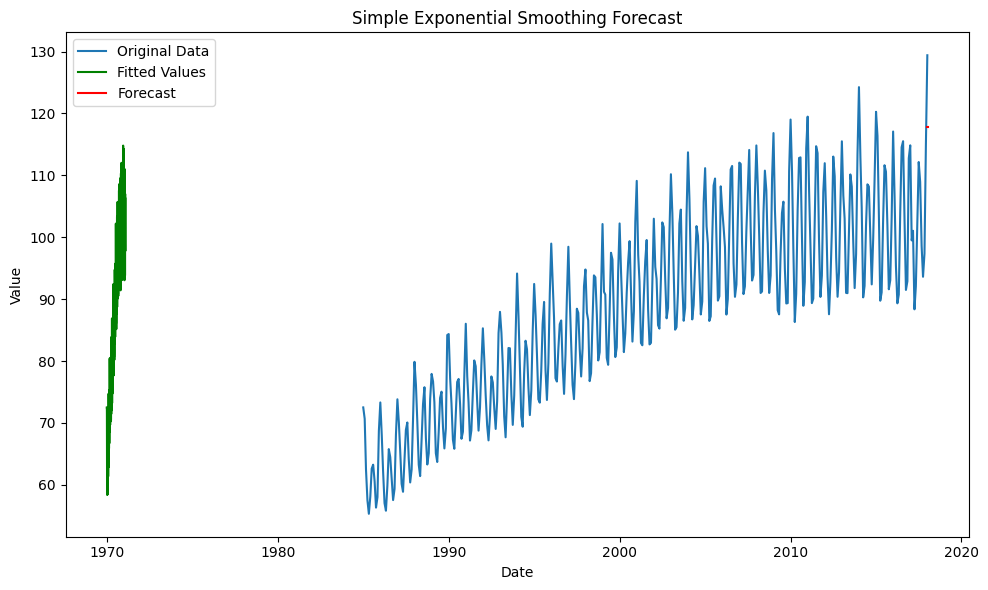

In [10]:
import pandas as pd
import matplotlib.pyplot as plt
from statsmodels.tsa.holtwinters import SimpleExpSmoothing

# Sort the data by date
data = data.sort_values(by='DATE')

ts = data['Value']

# Perform simple exponential smoothing
model = SimpleExpSmoothing(ts)
model_fit = model.fit(smoothing_level=0.5)

# forecasts for the next n time points
n_forecast = 5
forecast = model_fit.forecast(steps=n_forecast)

# Plot the original data and the forecasts
plt.figure(figsize=(10, 6))
plt.plot(data['DATE'], ts, label='Original Data')
plt.plot(model_fit.fittedvalues.index, model_fit.fittedvalues, color='green', label='Fitted Values')
plt.plot(pd.date_range(start=data['DATE'].iloc[-1], periods=n_forecast + 1, freq='D')[1:], forecast, color='red', label='Forecast')
plt.xlabel('Date')
plt.ylabel('Value')
plt.title('Simple Exponential Smoothing Forecast')
plt.legend()
plt.tight_layout()
plt.show()


Double exponential smoothing

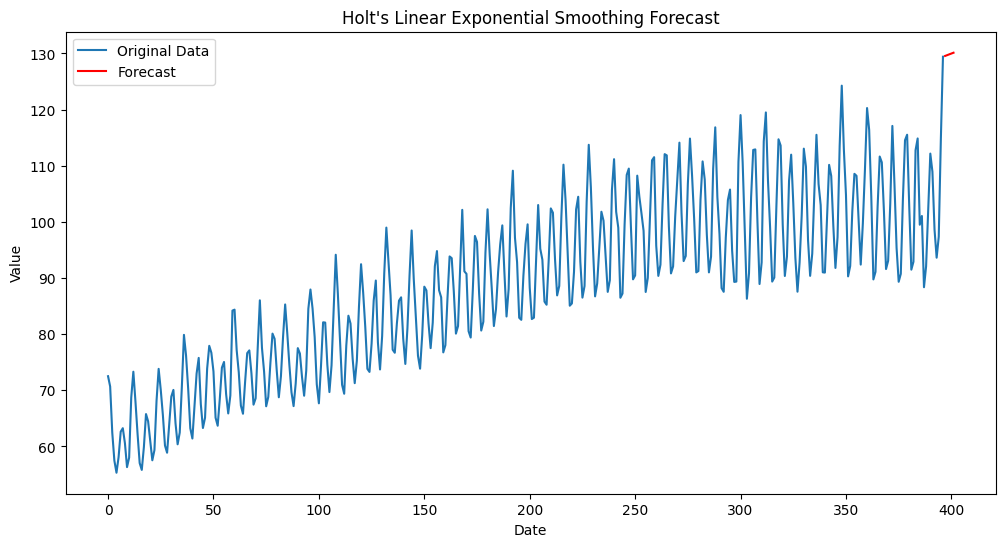

In [11]:
import pandas as pd
import matplotlib.pyplot as plt
from statsmodels.tsa.holtwinters import ExponentialSmoothing
ts_column = 'Value'

# Create the Holt's Linear Exponential Smoothing model
model = ExponentialSmoothing(data[ts_column], trend='add', seasonal=None)

# Fit the model
model_fit = model.fit()

# forecast the next 'n' time steps
forecast_steps = 5
forecast = model_fit.forecast(steps=forecast_steps)

# Plot the original data and the forecast
plt.figure(figsize=(12, 6))
plt.plot(data.index, data[ts_column], label='Original Data')
plt.plot(forecast.index, forecast, label='Forecast', color='red')
plt.legend()
plt.xlabel('Date')
plt.ylabel('Value')
plt.title('Holt\'s Linear Exponential Smoothing Forecast')
plt.show()


Decomposition techniques ---additive

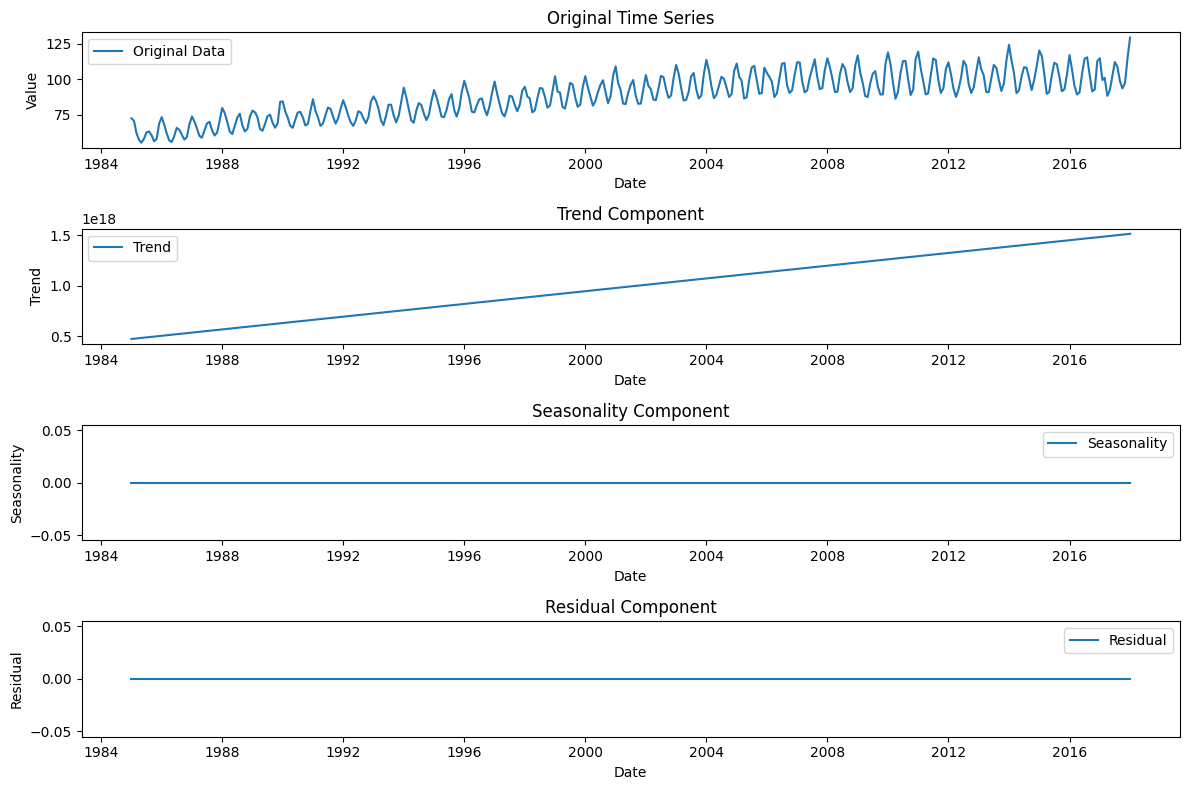

In [12]:
import pandas as pd
import matplotlib.pyplot as plt
from statsmodels.tsa.seasonal import seasonal_decompose

ts = data['Value']

# Perform seasonal decomposition

decomposition= seasonal_decompose(x=data['DATE'], model='additive', extrapolate_trend='freq', period=1)

# Extract components
trend = decomposition.trend
seasonal = decomposition.seasonal
residual = decomposition.resid

# Plot the components
plt.figure(figsize=(12, 8))

plt.subplot(411)
plt.plot(data['DATE'], ts, label='Original Data')
plt.legend()
plt.xlabel('Date')
plt.ylabel('Value')
plt.title('Original Time Series')

plt.subplot(412)
plt.plot(data['DATE'], trend, label='Trend')
plt.legend()
plt.xlabel('Date')
plt.ylabel('Trend')
plt.title('Trend Component')

plt.subplot(413)
plt.plot(data['DATE'], seasonal, label='Seasonality')
plt.legend()
plt.xlabel('Date')
plt.ylabel('Seasonality')
plt.title('Seasonality Component')

plt.subplot(414)
plt.plot(data['DATE'], residual, label='Residual')
plt.legend()
plt.xlabel('Date')
plt.ylabel('Residual')
plt.title('Residual Component')

plt.tight_layout()
plt.show()


Decomposition techniques ---Multiplicative

> Indented block



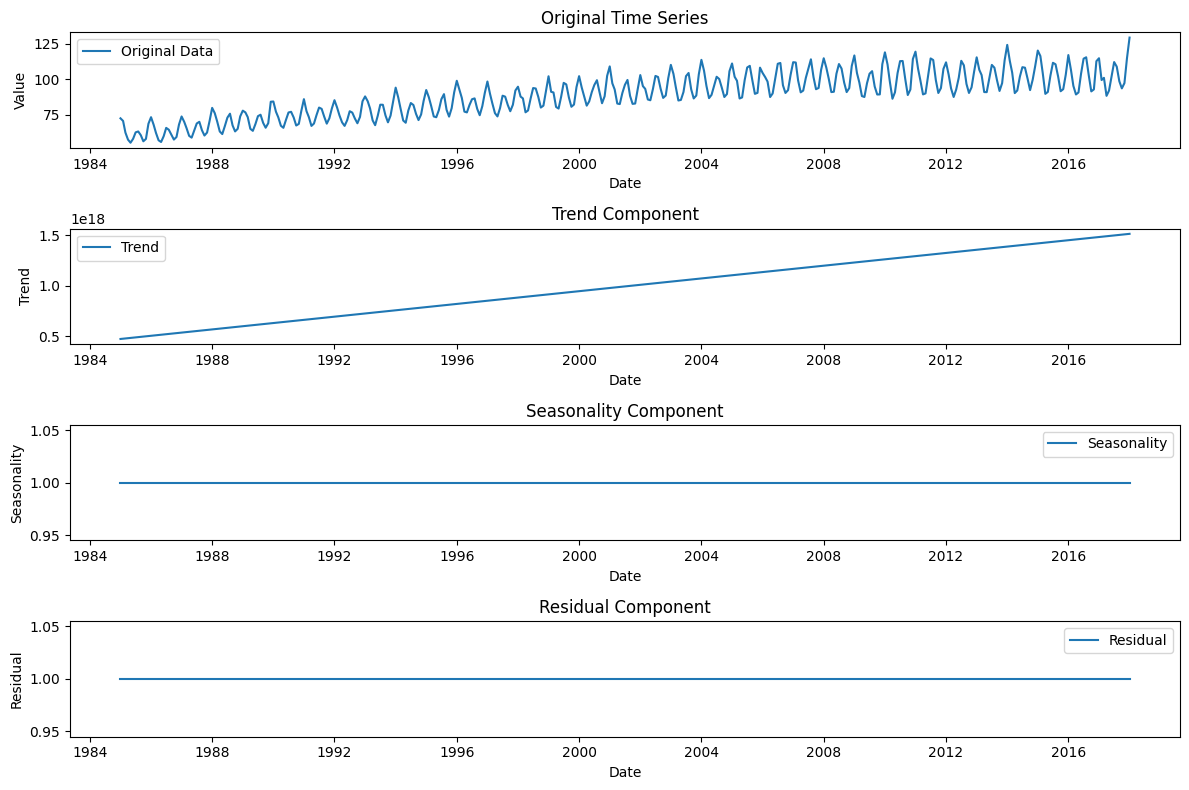

In [13]:
import pandas as pd
import matplotlib.pyplot as plt
from statsmodels.tsa.seasonal import seasonal_decompose

ts = data['Value']

# Perform seasonal decomposition

decomposition= seasonal_decompose(x=data['DATE'], model='multiplicative', extrapolate_trend='freq', period=1)

# Extract components
trend = decomposition.trend
seasonal = decomposition.seasonal
residual = decomposition.resid

# Plot the components
plt.figure(figsize=(12, 8))

plt.subplot(411)
plt.plot(data['DATE'], ts, label='Original Data')
plt.legend()
plt.xlabel('Date')
plt.ylabel('Value')
plt.title('Original Time Series')

plt.subplot(412)
plt.plot(data['DATE'], trend, label='Trend')
plt.legend()
plt.xlabel('Date')
plt.ylabel('Trend')
plt.title('Trend Component')

plt.subplot(413)
plt.plot(data['DATE'], seasonal, label='Seasonality')
plt.legend()
plt.xlabel('Date')
plt.ylabel('Seasonality')
plt.title('Seasonality Component')

plt.subplot(414)
plt.plot(data['DATE'], residual, label='Residual')
plt.legend()
plt.xlabel('Date')
plt.ylabel('Residual')
plt.title('Residual Component')

plt.tight_layout()
plt.show()


trying to see the trend value for both

In [14]:
import pandas as pd
import matplotlib.pyplot as plt
from statsmodels.tsa.seasonal import seasonal_decompose

ts = data['Value']

# Perform seasonal decomposition

decomposition= seasonal_decompose(x=data['DATE'], model='multiplicative', extrapolate_trend='freq', period=1)

# Extract components
trend = decomposition.trend
seasonal = decomposition.seasonal
residual = decomposition.resid

components_df = pd.DataFrame({
    'Date': data.index,
    'Actual': data['Value'],
    'Trend': trend,
    'Seasonality': seasonal,
    'Residual': residual
})

# Print the DataFrame
print(components_df)

     Date    Actual         Trend  Seasonality  Residual
0       0   72.5052  4.733856e+17          1.0       1.0
1       1   70.6720  4.760640e+17          1.0       1.0
2       2   62.4502  4.784832e+17          1.0       1.0
3       3   57.4714  4.811616e+17          1.0       1.0
4       4   55.3151  4.837536e+17          1.0       1.0
..    ...       ...           ...          ...       ...
392   392   98.6154  1.504224e+18          1.0       1.0
393   393   93.6137  1.506816e+18          1.0       1.0
394   394   97.3359  1.509494e+18          1.0       1.0
395   395  114.7212  1.512086e+18          1.0       1.0
396   396  129.4048  1.514765e+18          1.0       1.0

[397 rows x 5 columns]


In [15]:
import pandas as pd
import matplotlib.pyplot as plt
from statsmodels.tsa.seasonal import seasonal_decompose
ts = data['Value']

# Perform seasonal decomposition

decomposition= seasonal_decompose(x=data['DATE'], model='additive', extrapolate_trend='freq', period=1)

# Extract components
trend = decomposition.trend
seasonal = decomposition.seasonal
residual = decomposition.resid

components_df = pd.DataFrame({
    'Date': data.index,
    'Actual': data['Value'],
    'Trend': trend,
    'Seasonality': seasonal,
    'Residual': residual
})

# Print the DataFrame
print(components_df)

     Date    Actual         Trend  Seasonality  Residual
0       0   72.5052  4.733856e+17          0.0       0.0
1       1   70.6720  4.760640e+17          0.0       0.0
2       2   62.4502  4.784832e+17          0.0       0.0
3       3   57.4714  4.811616e+17          0.0       0.0
4       4   55.3151  4.837536e+17          0.0       0.0
..    ...       ...           ...          ...       ...
392   392   98.6154  1.504224e+18          0.0       0.0
393   393   93.6137  1.506816e+18          0.0       0.0
394   394   97.3359  1.509494e+18          0.0       0.0
395   395  114.7212  1.512086e+18          0.0       0.0
396   396  129.4048  1.514765e+18          0.0       0.0

[397 rows x 5 columns]


applied ADF TO check stationary or not

In [16]:
import pandas as pd
from statsmodels.tsa.stattools import adfuller

data = data.set_index('DATE')
ts_column = 'Value'

# Perform ADF test
result = adfuller(data[ts_column])

# Print the ADF test results
print("ADF Statistic:", result[0])
print("p-value:", result[1])
print("Critical Values:", result[4])


ADF Statistic: -2.256990350047235
p-value: 0.1862146911658712
Critical Values: {'1%': -3.4476305904172904, '5%': -2.869155980820355, '10%': -2.570827146203181}


performing 1st order differenciating

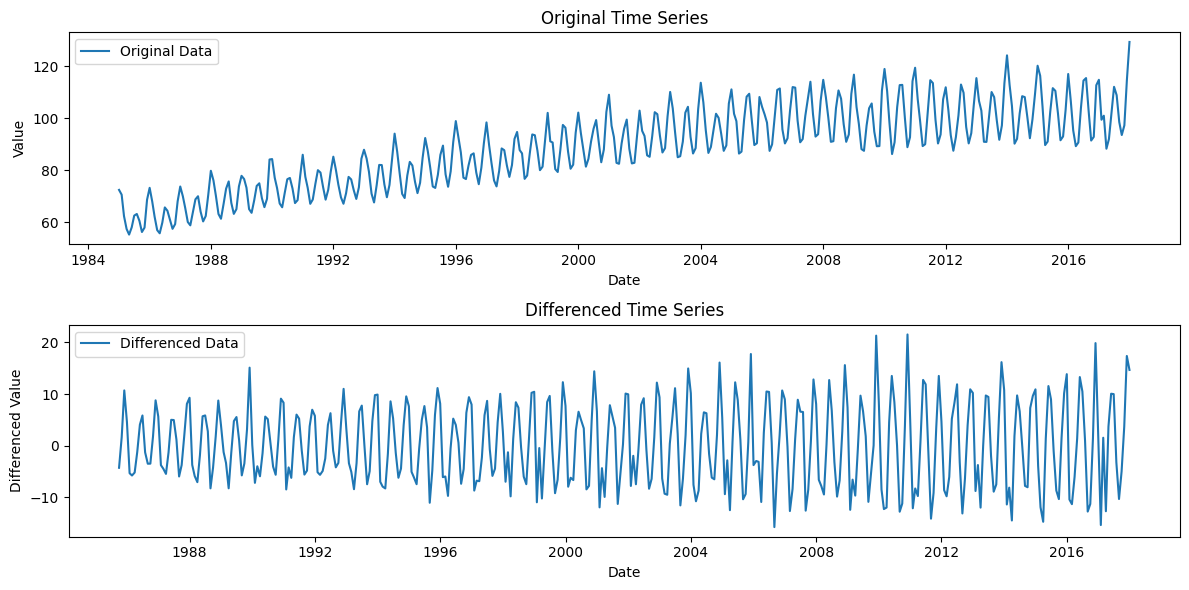

In [17]:
import pandas as pd
import matplotlib.pyplot as plt


# Perform differencing to make the data stationary
data_diff = data.diff().dropna()

# Plot the original and differenced data
plt.figure(figsize=(12, 6))
plt.subplot(2, 1, 1)
plt.plot(data.index, data['Value'], label='Original Data')
plt.legend()
plt.xlabel('Date')
plt.ylabel('Value')
plt.title('Original Time Series')

plt.subplot(2, 1, 2)
plt.plot(data_diff.index, data_diff['Value'], label='Differenced Data')
plt.legend()
plt.xlabel('Date')
plt.ylabel('Differenced Value')
plt.title('Differenced Time Series')

plt.tight_layout()
plt.show()


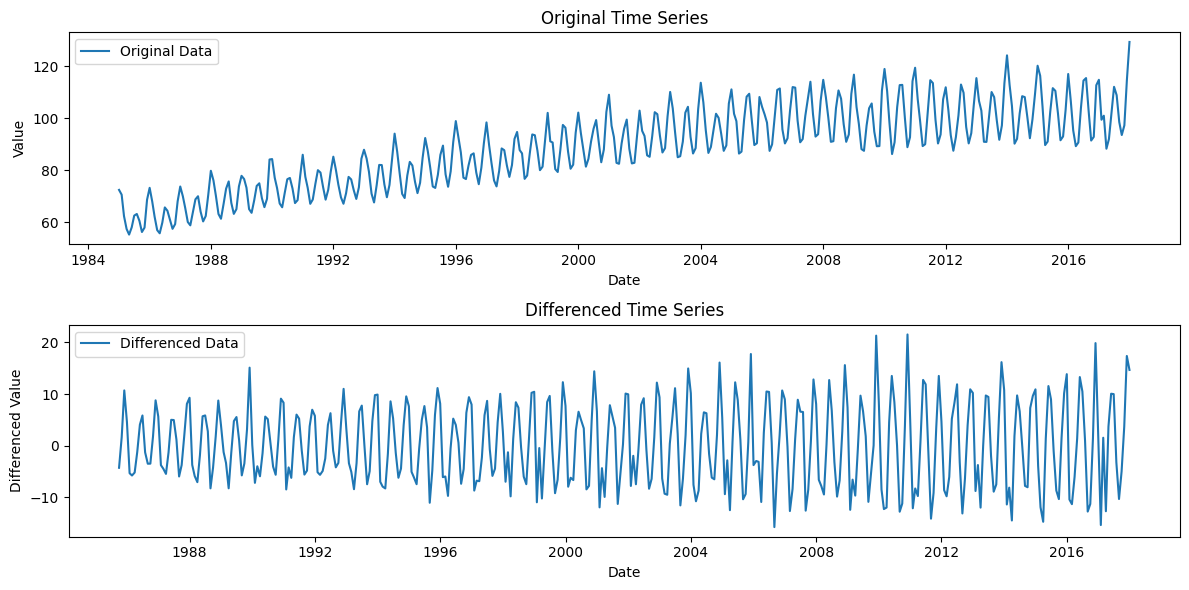

In [18]:
import pandas as pd
import matplotlib.pyplot as plt

# Calculate the first-order difference to make the data stationary
data_diff = data.diff().dropna()

# Plot the original and differenced data
plt.figure(figsize=(12, 6))
plt.subplot(2, 1, 1)
plt.plot(data.index, data['Value'], label='Original Data')
plt.legend()
plt.xlabel('Date')
plt.ylabel('Value')
plt.title('Original Time Series')

plt.subplot(2, 1, 2)
plt.plot(data_diff.index, data_diff['Value'], label='Differenced Data')
plt.legend()
plt.xlabel('Date')
plt.ylabel('Differenced Value')
plt.title('Differenced Time Series')

plt.tight_layout()
plt.show()





In [19]:
from statsmodels.tsa.stattools import adfuller

# Perform ADF test on the differenced data
result_diff = adfuller(data_diff['Value'])

# Print the ADF test results for the differenced data
print("ADF Statistic:", result_diff[0])
print("p-value:", result_diff[1])
print("Critical Values:", result_diff[4])


ADF Statistic: -7.027310214376451
p-value: 6.315636395228482e-10
Critical Values: {'1%': -3.448003816652923, '5%': -2.86931999731073, '10%': -2.5709145866785503}


In [20]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

import matplotlib
matplotlib.rc('xtick', labelsize=30)
matplotlib.rc('ytick', labelsize=30)

import seaborn as sns
sns.set(style="whitegrid", color_codes=True)
from statsmodels.tsa.stattools import acf, pacf

realistic vision

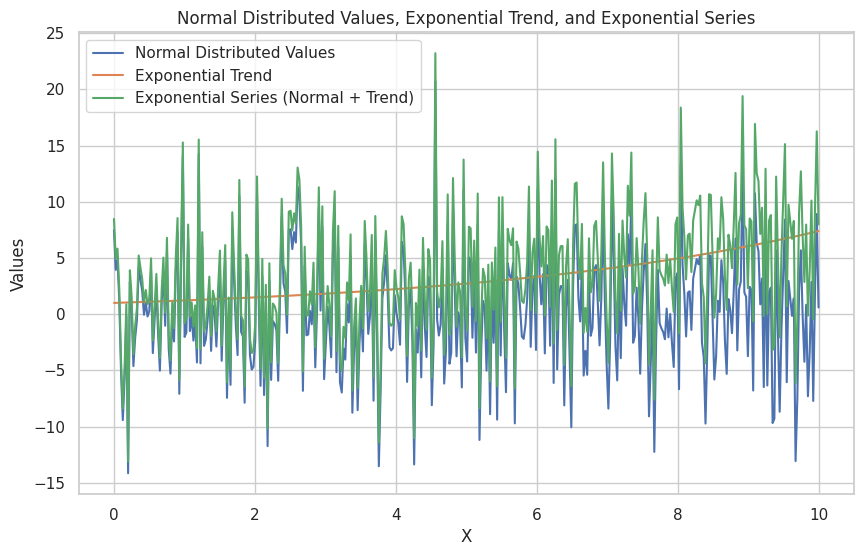

In [21]:
import numpy as np
import matplotlib.pyplot as plt

# Generate x values for plotting
x = np.linspace(0, 10, 400)

# Generate normally distributed values
normal_values = np.random.normal(0, 5, 400)

# Generate an exponential trend
exponential_trend = np.exp(0.2 * x)

# Combine normal values and exponential trend
exponential_series = normal_values + exponential_trend

# Plot the normal distributed values, exponential trend, and exponential series
plt.figure(figsize=(10, 6))
plt.plot(x, normal_values, label='Normal Distributed Values')
plt.plot(x, exponential_trend, label='Exponential Trend')
plt.plot(x, exponential_series, label='Exponential Series (Normal + Trend)')
plt.legend()
plt.xlabel('X')
plt.ylabel('Values')
plt.title('Normal Distributed Values, Exponential Trend, and Exponential Series')
plt.grid(True)
plt.show()


ACF tried with different lag values

<Figure size 1000x600 with 0 Axes>

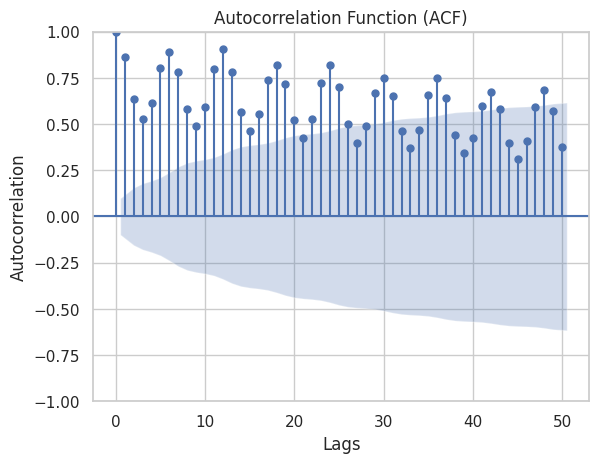

In [22]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from statsmodels.graphics.tsaplots import plot_acf

# Plot the ACF
plt.figure(figsize=(10, 6))
plot_acf(data[ts_column], lags=50)  # Set the number of lags to analyze
plt.xlabel('Lags')
plt.ylabel('Autocorrelation')
plt.title('Autocorrelation Function (ACF)')
plt.grid(True)
plt.show()


<Figure size 1000x600 with 0 Axes>

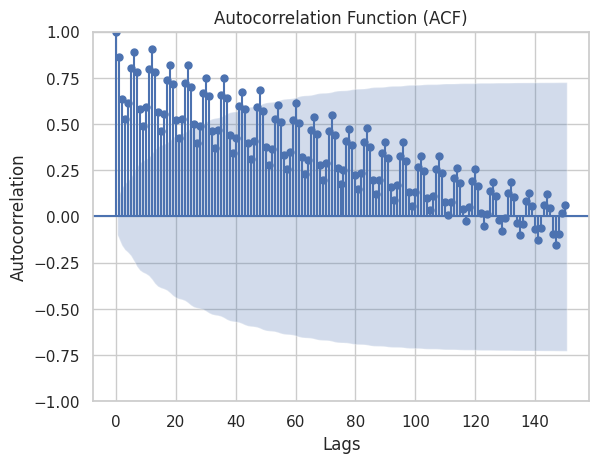

In [23]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from statsmodels.graphics.tsaplots import plot_acf

# Plot the ACF
plt.figure(figsize=(10, 6))
plot_acf(data[ts_column], lags=150)  # Set the number of lags to analyze
plt.xlabel('Lags')
plt.ylabel('Autocorrelation')
plt.title('Autocorrelation Function (ACF)')
plt.grid(True)
plt.show()


<Figure size 1000x600 with 0 Axes>

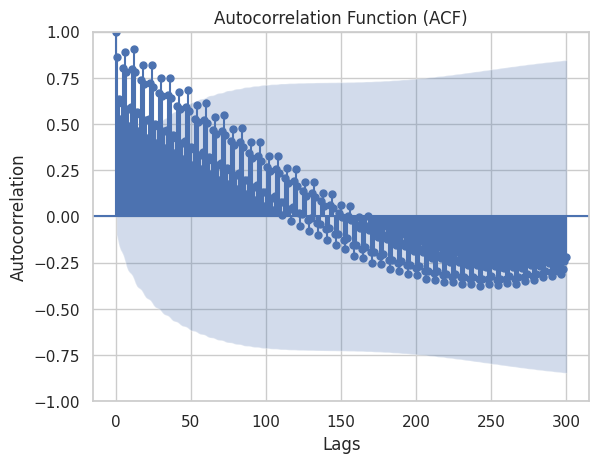

In [24]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from statsmodels.graphics.tsaplots import plot_acf

# Plot the ACF
plt.figure(figsize=(10, 6))
plot_acf(data[ts_column], lags=300)  # Set the number of lags to analyze
plt.xlabel('Lags')
plt.ylabel('Autocorrelation')
plt.title('Autocorrelation Function (ACF)')
plt.grid(True)
plt.show()


PCF

<Figure size 1000x600 with 0 Axes>

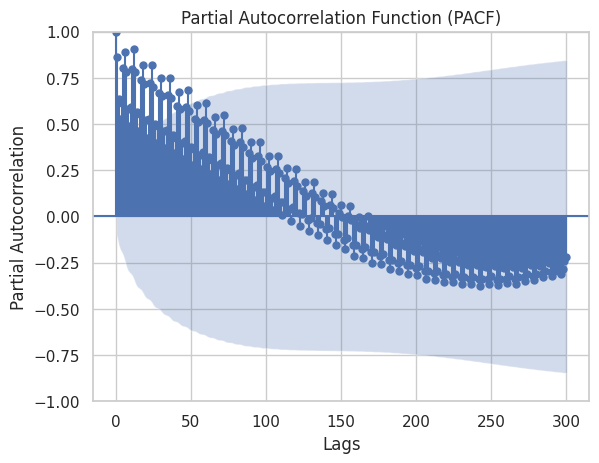

In [25]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from statsmodels.graphics.tsaplots import plot_pacf

# Plot the ACF
plt.figure(figsize=(10, 6))
plot_acf(data[ts_column], lags=300)  # Set the number of lags.
plt.xlabel('Lags')
plt.ylabel('Partial Autocorrelation')
plt.title('Partial Autocorrelation Function (PACF)')
plt.grid(True)
plt.show()


AR model

/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)


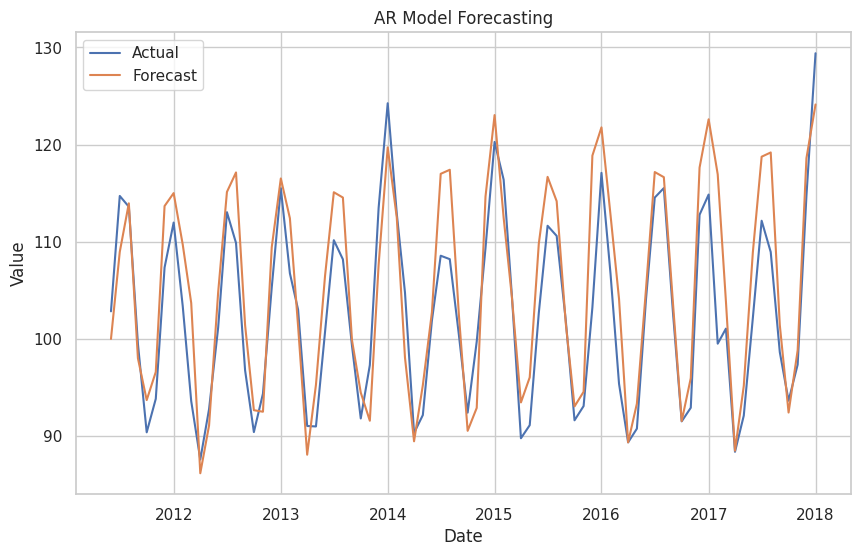

Root Mean Squared Error (RMSE): 5.17


In [26]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from statsmodels.tsa.ar_model import AutoReg
from sklearn.metrics import mean_squared_error

# Train-test split
train_size = int(len(data) * 0.8)
train_data, test_data = data.iloc[:train_size], data.iloc[train_size:]

# Fit AR model
lag_order = 90 # Number of lagged values
ar_model = AutoReg(train_data[ts_column], lags=lag_order)
ar_model_fit = ar_model.fit()

# Forecast
forecast_steps = len(test_data)
forecast = ar_model_fit.forecast(steps=forecast_steps)

# Calculate RMSE
rmse = np.sqrt(mean_squared_error(test_data[ts_column], forecast))

# Plot actual vs. forecast
plt.figure(figsize=(10, 6))
plt.plot(test_data.index, test_data[ts_column], label='Actual')
plt.plot(test_data.index, forecast, label='Forecast')
plt.xlabel('Date')
plt.ylabel('Value')
plt.title('AR Model Forecasting')
plt.legend()
plt.grid(True)
plt.show()

print(f"Root Mean Squared Error (RMSE): {rmse:.2f}")


In [27]:
from sklearn.metrics import mean_squared_error, mean_absolute_error, mean_absolute_percentage_error,accuracy_score


In [28]:
# Calculate MAE
mae = mean_absolute_error(test_data[ts_column], forecast)

# Calculate MAPE
def mean_absolute_percentage_error(y_true, y_pred):
    return np.mean(np.abs((y_true - y_pred) / y_true)) * 100
mape = mean_absolute_percentage_error(test_data[ts_column], forecast)
print(f"Mean Absolute Error (MAE): {mae:.2f}")
print(f"Mean Absolute Percentage Error (MAPE): {mape:.2f}%")

Mean Absolute Error (MAE): 4.05
Mean Absolute Percentage Error (MAPE): 3.92%


In [29]:
# Forecast using the AR model
forecast_steps = len(test_data)
forecast = ar_model_fit.forecast(steps=forecast_steps)

# Convert the forecasted values to binary predictions (increase or decrease)
binary_forecast = np.sign(np.diff(forecast))

# Convert the actual values to binary (increase or decrease)
binary_actual = np.sign(np.diff(test_data[ts_column].values))

# Calculate accuracy score
accuracy = accuracy_score(binary_actual, binary_forecast)

print(f"Accuracy Score: {accuracy:.2f}")

Accuracy Score: 0.89


In [30]:
import pandas as pd
import numpy as np
from sklearn.metrics import mean_squared_error


# Split data into train and test sets
train_size = int(len(data) * 0.8)
train_data, test_data = data.iloc[:train_size], data.iloc[train_size:]

# Create a baseline that predicts future values as the average of historical values
baseline_predictions = np.full(len(test_data), train_data[ts_column].mean())

# Calculate RMSE for the baseline
baseline_rmse = np.sqrt(mean_squared_error(test_data[ts_column], baseline_predictions))


forecast_rmse = 5.48

print(f"Baseline RMSE: {baseline_rmse:.2f}")
print(f"Model RMSE: {forecast_rmse:.2f}")

# Compare the two RMSE values
if forecast_rmse < baseline_rmse:
    print("The forecasting model is better than the baseline.")
else:
    print("The baseline is better than the forecasting model.")


Baseline RMSE: 19.83
Model RMSE: 5.48
The forecasting model is better than the baseline.


tried to find best window size with cross validation formoving average

In [55]:
import numpy as np
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import TimeSeriesSplit

# Define a range of window sizes to test
window_sizes = range(2, 10)

# Initialize variables to store results
fold_accuracies = []

# Perform k-fold cross-validation
k_folds = 5
tscv = TimeSeriesSplit(n_splits=k_folds)

for window_size in window_sizes:
    fold_mses = []

    for fold, (train_idx, test_idx) in enumerate(tscv.split(data), start=1):
        train_data = data.iloc[train_idx]
        test_data = data.iloc[test_idx]

        # Calculate the moving average using the current window size
        moving_average = np.convolve(train_data['Value'], np.ones(window_size)/window_size, mode='valid')

        # Forecast using the moving average
        forecast = np.repeat(moving_average[-1], len(test_data))  # Forecast the last value of moving_average

        # Make sure the lengths of test_data and forecast are the same
        forecast = forecast[:len(test_data)]

        # Calculate MSE
        mse = mean_squared_error(test_data['Value'], forecast)  # Compare 'value' column of test_data
        fold_mses.append(mse)

        print(f"split {fold}, Window Size {window_size}, MSE: {mse}")

    # Calculate the mean MSE for the current window size and fold
    mean_mse = np.mean(fold_mses)
    fold_accuracies.append(mean_mse)

# Calculate the mean accuracy across all folds for each window size
mean_accuracies = np.mean(fold_accuracies, axis=0)

# Find the best window size with the lowest mean accuracy
best_window_size = window_sizes[np.argmin(mean_accuracies)]
best_mean_accuracy = np.min(mean_accuracies)

print("Best Window Size:", best_window_size)
print("Best Mean Accuracy:", best_mean_accuracy)


split 1, Window Size 2, MSE: 65.66797898242417
split 2, Window Size 2, MSE: 111.14339434128796
split 3, Window Size 2, MSE: 82.12988866795459
split 4, Window Size 2, MSE: 127.48422476530311
split 5, Window Size 2, MSE: 111.1429368240152
split 1, Window Size 3, MSE: 93.66985896515156
split 2, Window Size 3, MSE: 63.42851522803031
split 3, Window Size 3, MSE: 119.13063985924245
split 4, Window Size 3, MSE: 88.76574956166662
split 5, Window Size 3, MSE: 94.03590724924241
split 1, Window Size 4, MSE: 107.71487658820071
split 2, Window Size 4, MSE: 62.29932188015146
split 3, Window Size 4, MSE: 145.54619715280307
split 4, Window Size 4, MSE: 90.15680419621214
split 5, Window Size 4, MSE: 112.04750544674235
split 1, Window Size 5, MSE: 99.36274473941815
split 2, Window Size 5, MSE: 69.8838338001757
split 3, Window Size 5, MSE: 129.69389604460002
split 4, Window Size 5, MSE: 93.28656906763024
split 5, Window Size 5, MSE: 121.7163062090242
split 1, Window Size 6, MSE: 85.96750249371212
split 2

SMA

In [38]:
import pandas as pd
import numpy as np
from sklearn.metrics import mean_squared_error

# Split data into train and test sets
train_size = int(len(data) * 0.8)
train_data, test_data = data.iloc[:train_size], data.iloc[train_size:]

# Calculate the simple moving average (SMA) of the training data
window_size = 2
sma = train_data[ts_column].rolling(window=window_size).mean()

# Create a moving average model using the SMA values
ma_model = sma.iloc[-1]  # Use the last SMA value as the MA model's prediction

# Forecast using the MA model
ma_predictions = [ma_model] * len(test_data)

# Calculate the RMSE for the MA model's predictions
ma_rmse = np.sqrt(mean_squared_error(test_data[ts_column], ma_predictions))

print(f"Moving Average RMSE: {ma_rmse:.2f}")


Moving Average RMSE: 16.14


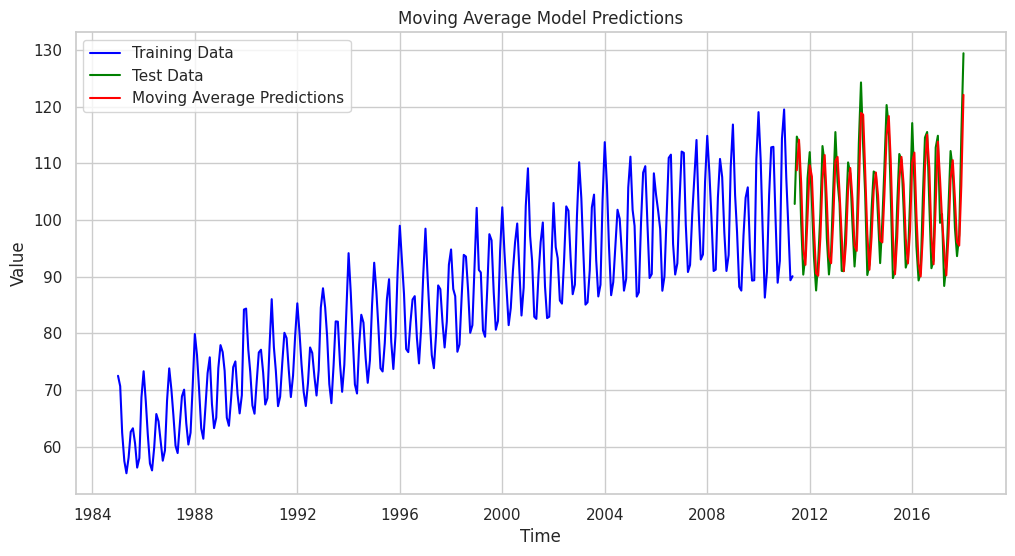

In [39]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

train_size = int(len(data) * 0.8)
train_data, test_data = data.iloc[:train_size], data.iloc[train_size:]

window_size = 2  # Replace with the appropriate window size
sma = train_data[ts_column].rolling(window=window_size).mean()

# Calculate the moving average predictions for the test period
ma_predictions = test_data[ts_column].rolling(window=window_size).mean()

# Plot the original time series data and the MA model's predictions
plt.figure(figsize=(12, 6))
plt.plot(train_data[ts_column], label='Training Data', color='blue')
plt.plot(test_data[ts_column], label='Test Data', color='green')
plt.plot(test_data.index, ma_predictions, label='Moving Average Predictions', color='red')
plt.title('Moving Average Model Predictions')
plt.xlabel('Time')
plt.ylabel('Value')
plt.legend()
plt.show()


ARMA

In [40]:
import pandas as pd
import numpy as np
from statsmodels.tsa.arima.model import ARIMA
from sklearn.metrics import mean_squared_error

train_size = int(len(data) * 0.8)
train_data, test_data = data.iloc[:train_size], data.iloc[train_size:]

# Fit an ARMA model to the training data
order = (10,0, 2)  # Replace with appropriate values for p, q
arma_model = ARIMA(train_data[ts_column], order=order)
arma_fit = arma_model.fit()

# Forecast using the ARMA model
forecast_steps = len(test_data)
forecast = arma_fit.forecast(steps=forecast_steps)

# Calculate RMSE for the ARMA model's predictions
arma_rmse = np.sqrt(mean_squared_error(test_data[ts_column], forecast))

print(f"ARMA RMSE: {arma_rmse:.2f}")


/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


ARMA RMSE: 5.06


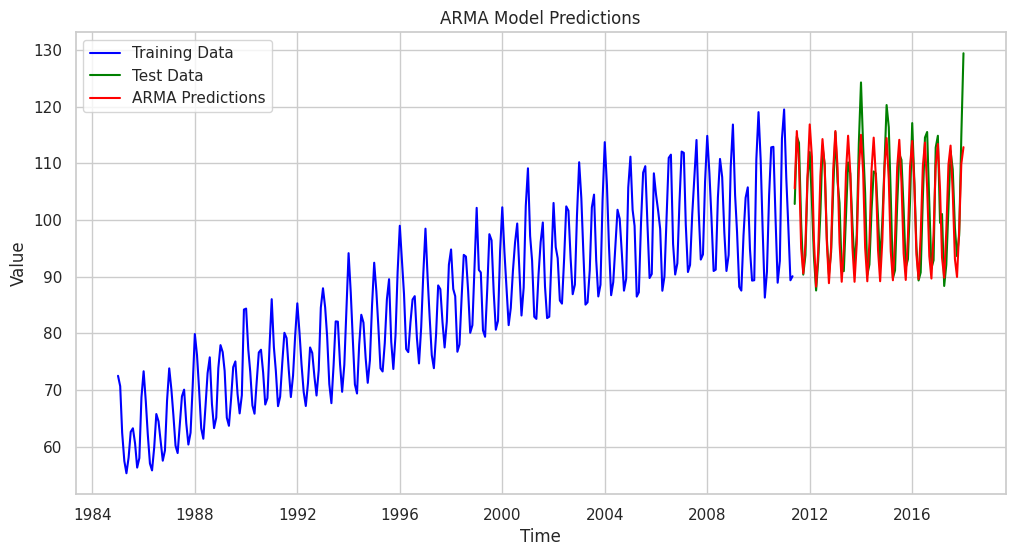

In [41]:


# Plot the original time series data and the ARMA model's predictions
plt.figure(figsize=(12, 6))
plt.plot(train_data[ts_column], label='Training Data', color='blue')
plt.plot(test_data[ts_column], label='Test Data', color='green')
plt.plot(test_data.index, forecast, label='ARMA Predictions', color='red')
plt.title('ARMA Model Predictions')
plt.xlabel('Time')
plt.ylabel('Value')
plt.legend()
plt.show()

ARIMA

/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


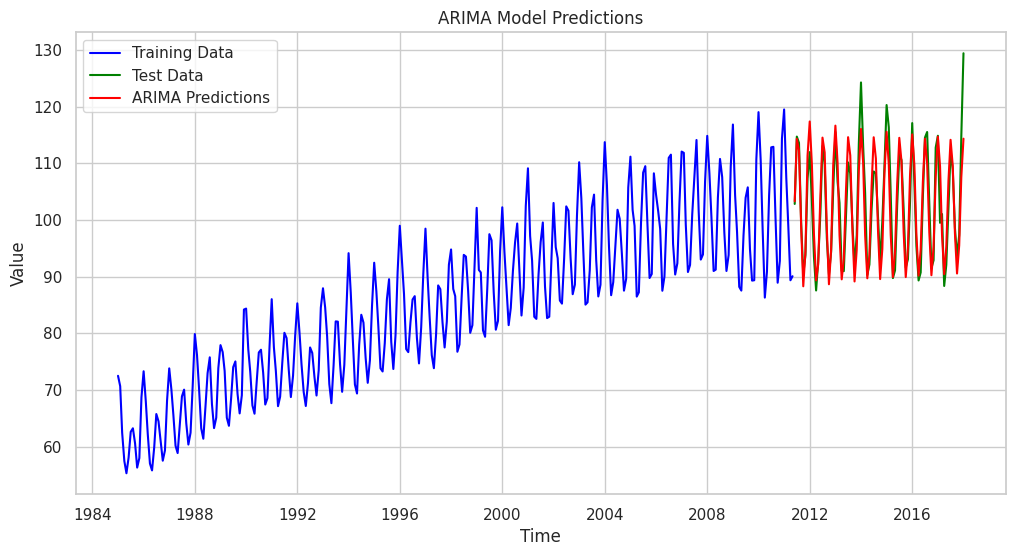

ARIMA RMSE: 4.03


In [42]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from statsmodels.tsa.arima.model import ARIMA
from sklearn.metrics import mean_squared_error


# Split data into train and test sets
train_size = int(len(data) * 0.8)
train_data, test_data = data.iloc[:train_size], data.iloc[train_size:]

# Fit an ARIMA model to the training data
order = (10, 1, 2)  # appropriate values for p, d, q
arima_model = ARIMA(train_data[ts_column], order=order)
arima_fit = arima_model.fit()

# Forecast using the ARIMA model
forecast_steps = len(test_data)
forecast = arima_fit.forecast(steps=forecast_steps)

# Plot the original time series data and the ARIMA model's predictions
plt.figure(figsize=(12, 6))
plt.plot(train_data[ts_column], label='Training Data', color='blue')
plt.plot(test_data[ts_column], label='Test Data', color='green')
plt.plot(test_data.index, forecast, label='ARIMA Predictions', color='red')
plt.title('ARIMA Model Predictions')
plt.xlabel('Time')
plt.ylabel('Value')
plt.legend()
plt.show()

# Calculate RMSE for the ARIMA model's predictions
arima_rmse = np.sqrt(mean_squared_error(test_data[ts_column], forecast))

print(f"ARIMA RMSE: {arima_rmse:.2f}")






csv file to check the arima value by plot

In [43]:
import pandas as pd
import numpy as np
from statsmodels.tsa.arima.model import ARIMA

ts_column = 'Value'

# Fit an ARIMA model to the entire data
order = (10, 1, 2)  # appropriate values for p, d, q
arima_model = ARIMA(data[ts_column], order=order)
arima_fit = arima_model.fit()


# Forecast using the ARMA model
forecast_steps = len(test_data)
forecast = arma_fit.forecast(steps=forecast_steps)

# Create a DataFrame with date-wise predictions
datewise_predictions = pd.DataFrame({
    'ARIMA_Predictions': forecast
})
# Print the date-wise ARIMA predictions
print(datewise_predictions)

# Save the date-wise ARIMA predictions to a CSV file
datewise_predictions.to_csv('arima_predictions.csv', index=False)


/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)


            ARIMA_Predictions
2011-06-01         105.541233
2011-07-01         115.681454
2011-08-01         110.068458
2011-09-01          94.981696
2011-10-01          90.567792
...                       ...
2017-09-01          93.116481
2017-10-01          89.942544
2017-11-01          98.305289
2017-12-01         109.869521
2018-01-01         112.833872

[80 rows x 1 columns]


/usr/local/lib/python3.10/dist-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


In [59]:
import warnings
warnings.filterwarnings("ignore")

find the best one model ARIMA,ARMA

In [60]:
import numpy as np
from statsmodels.tsa.arima.model import ARIMA
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import TimeSeriesSplit

# Choose the best parameters for ARMA and ARIMA models
best_arma_params = (10, 0, 2)
best_arima_params = (10, 1, 2)

# Initialize variables to store results
arma_fold_mses = []
arima_fold_mses = []

# Perform k-fold cross-validation
k_folds = 5
tscv = TimeSeriesSplit(n_splits=k_folds)

for fold, (train_idx, test_idx) in enumerate(tscv.split(data), start=1):
    train_data = data.iloc[train_idx]['Value']
    test_data = data.iloc[test_idx]['Value']

    # ARMA model
    arma_model = ARIMA(train_data, order=best_arma_params)
    arma_fit = arma_model.fit()
    arma_forecast = arma_fit.forecast(steps=len(test_data))
    arma_mse = mean_squared_error(test_data, arma_forecast)
    arma_fold_mses.append(arma_mse)

    # ARIMA model
    arima_model = ARIMA(train_data, order=best_arima_params)
    arima_fit = arima_model.fit()
    arima_forecast = arima_fit.forecast(steps=len(test_data))
    arima_mse = mean_squared_error(test_data, arima_forecast)
    arima_fold_mses.append(arima_mse)

    print(f"Fold {fold} - ARMA MSE: {arma_mse:.2f}, ARIMA MSE: {arima_mse:.2f}")

# Calculate the mean accuracy (MSE) for both ARMA and ARIMA models
mean_arma_mse = np.mean(arma_fold_mses)
mean_arima_mse = np.mean(arima_fold_mses)

print("Mean ARMA MSE:", mean_arma_mse)
print("Mean ARIMA MSE:", mean_arima_mse)


Fold 1 - ARMA MSE: 80.94, ARIMA MSE: 47.37
Fold 2 - ARMA MSE: 41.17, ARIMA MSE: 32.58
Fold 3 - ARMA MSE: 61.11, ARIMA MSE: 34.03
Fold 4 - ARMA MSE: 18.80, ARIMA MSE: 15.73
Fold 5 - ARMA MSE: 30.50, ARIMA MSE: 27.23
Mean ARMA MSE: 46.50379018205213
Mean ARIMA MSE: 31.38986056972925
